In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
from scipy.signal import find_peaks, savgol_filter
import numpy as np
from hydrogen import load_hydrogen_spectrum

For this lab, you'll be getting to know how to use python a bit more.

We'll start by plotting the wavefunction of a quantum harmonic oscillator. We'll talk about in in class on monday but the potential for a harmonic osciallator looks like


$$ U = \frac{1}{2}k x^2 $$


The first few energy levels (n=1, 2, 3) have wavefunctions given by

$$ \psi_1 = \left(\frac{\alpha}{\pi}\right)^\frac{1}{4} \exp(-\alpha x^2 /2)$$

$$ \psi_2 = \left(\frac{\alpha}{\pi}\right)^\frac{1}{4} \sqrt{2\alpha} x\exp(-\alpha x^2 /2)$$

$$ \psi_3 = \left(\frac{\alpha}{\pi}\right)^\frac{1}{4} \frac{1}{\sqrt{2}}\left(2\alpha x^2 -1 \right) \exp(-\alpha x^2 /2)$$

$\alpha$ is a constant that contains information about the mass of the particle and the effective spring constant $\alpha = \sqrt{m k}/\hbar$

Below, define functions to evaluate each wave function. Plot them all on the same axis for $\alpha=0.5$ and $-3 < x < 3$

You'll probably want to use `np.power`, `np.exp`, `np.sqrt` and `np.linspace`. Feel free to refer to the example notebook or look up these functions online to understand how they work.

Next, we'll analyze some data from a spectrometer measuring the emission spectrum from hydrogen. If you heat up hydrogen gas, the electron jump between energy levels and emit photons when they decay. This produces light at specific frequencies.

Since this is real data, they'll be some background noise, and imperfections in the data. Let's plot it and see what it looks like. We'll also use a data smoothing filter to remove some of the noise.

In [16]:
wavelengths, intensities = load_hydrogen_spectrum()

In [17]:
smoothed_intensities = savgol_filter(intensities, window_length=15, polyorder=1)

<IPython.core.display.Javascript object>


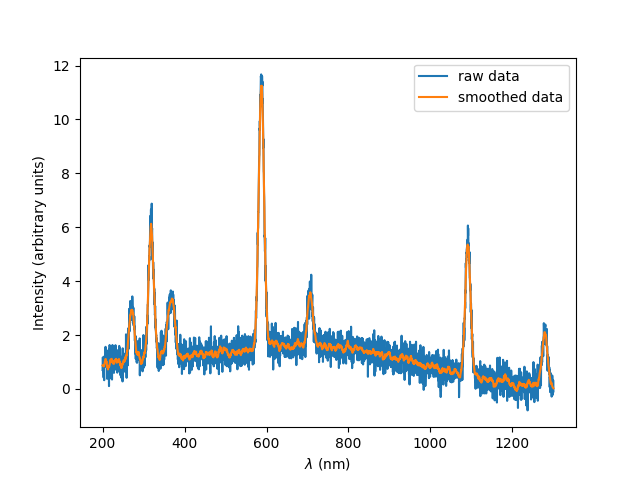

In [18]:
plt.figure()
plt.plot(wavelengths, intensities, label='raw data')
plt.plot(wavelengths, smoothed_intensities, label='smoothed data')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')
plt.legend()
plt.show()

Next we'll use the `find peaks` to automatically locate the x-position (wavelength $\lambda$) of the peaks in the spectrum. These peaks will correspond to the difference in energy between energy levels

In [8]:
peak_indices, peak_data = find_peaks(intensities)

<IPython.core.display.Javascript object>


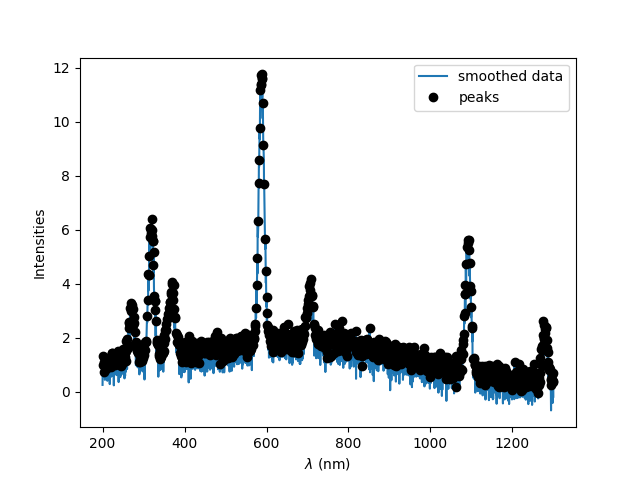

In [14]:
plt.figure()
plt.plot(wavelengths, intensities, label='smoothed data')
plt.plot(wavelengths[peak_indices], intensities[peak_indices], 'ok', label='peaks')
plt.legend()
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Intensities')
plt.show()

Clearly, that didn't work. Read about the `find_peaks` function, particularly the `prominence` and `height` parameters. Modify the arguments you use to call `find_peaks` to find the wavelength at the 7 peaks in this distribution automatically. Here's a [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) to the documentation.